In [ ]:
import Salami.helpFunctions as hf 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import imread
import scipy as sp
import os

Load Data

In [15]:
# Folder where your data files are placed
dirIn = r'C:\Users\suzan\OneDrive\School\DTU\Semester 4\Mathematical Modeling\Exercise 1\data'

matFile = os.path.join(dirIn, 'multispectral_day01.mat')
annFile = os.path.join(dirIn, 'annotation_day01.png')

# Load multispectral image and annotation using your original helpFunctions
multiIm, annotationIm = hf.loadMulti(matFile, annFile)

## The function getPix extracts the multi spectral pixels from the annotation
# Here is an example with meat- and fat annotation
[fatPix, fatR, fatC] = hf.getPix(multiIm, annotationIm[:,:,1]);
[meatPix, meatR, meatC] = hf.getPix(multiIm, annotationIm[:,:,2]);

1. Threshold value for a single spectral band

In [16]:
mean_fat = np.mean(fatPix,0)
mean_meat = np.mean(meatPix,0)

var_fat = np.var(fatPix, 0)
var_meat = np.var(meatPix, 0)

t_list = []
errors = []

for i in range(19):
    t = (mean_fat[i] + mean_meat[i])/2
    t_list.append(t)

    n_fat = fatPix.shape[0]
    n_meat = meatPix.shape[0]

    fat_errors = np.sum(fatPix[:, i] < t)
    meat_errors = np.sum(meatPix[:, i] >= t)

    error = (fat_errors + meat_errors) / (n_fat + n_meat)
    errors.append(error)
    #print(f"Spectral Band: {i+1}, t = {t}, error = {error}")

min_error = np.min(errors)
index = errors.index(min_error)
print(f"Spectral Band: {index}, t = {t_list[index]: .3}, error = {min_error: .3}")

Spectral Band: 13, t =  69.0, error =  0.00464


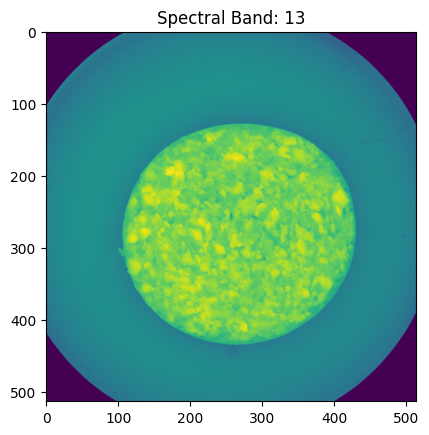

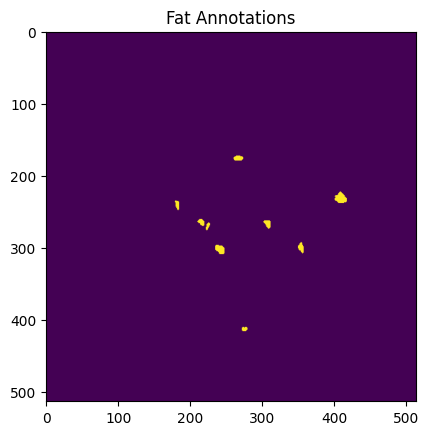

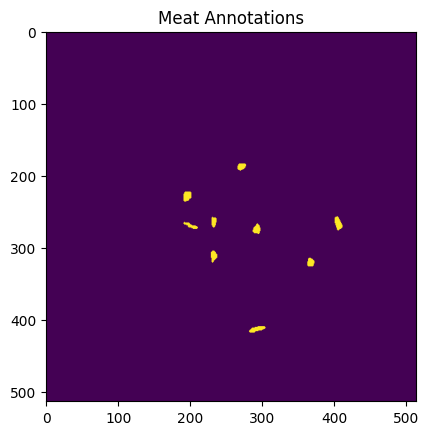

In [17]:
## Show image óf spectral band with lowest error
plt.imshow(multiIm[:,:,index-1])
plt.title(f"Spectral Band: {index}")
plt.show()

## In each layer we have a binary image:
# 0 - background with salami
# 1 fat annotation
# 2 meat annotation

# Here we show the far annotation
plt.imshow(annotationIm[:,:,1])
plt.title("Fat Annotations")
plt.show()

# Here we show the meat annotation
plt.imshow(annotationIm[:,:,2])
plt.title("Meat Annotations")
plt.show()

2. Classification by means of all spectral band

In [31]:
# Covariance
cov_fat = np.cov(fatPix, rowvar=False)
cov_meat = np.cov(meatPix, rowvar=False)

# Number of fat and meat pixels
nf = np.shape(fatPix)[0]
nm = np.shape(meatPix)[0]

# Pooler Covariance - equation 20
pooled_cov = ((nf-1)*cov_fat + (nm-1)*cov_meat)/((nf-1)+(nm-1))

# Discriminant Function - equation 23
p_fat = nf / (nf + nm)
p_meat = nm / (nf + nm)
cov_inv = np.linalg.inv(pooled_cov)

# fat pixels
Sff = fatPix @ cov_inv @ mean_fat  - 0.5 * mean_fat  @ cov_inv @ mean_fat  + np.log(p_fat)
Sfm = fatPix @ cov_inv @ mean_meat - 0.5 * mean_meat @ cov_inv @ mean_meat + np.log(p_meat)

# meat pixels
Smf = meatPix @ cov_inv @ mean_fat  - 0.5 * mean_fat  @ cov_inv @ mean_fat  + np.log(p_fat)
Smm = meatPix @ cov_inv @ mean_meat - 0.5 * mean_meat @ cov_inv @ mean_meat + np.log(p_meat)

# Error rate
fat_errors  = np.sum(Sff < Sfm)
meat_errors = np.sum(Smm < Smf)

error = (fat_errors + meat_errors) / (nf + nm)
print(f"Error rate = {error: .3}")

Error rate =  0.0058


3. Calculation for all days